<a href="https://colab.research.google.com/github/saadkhalidabbasi/EDA-Projects/blob/main/Fish_Species_Measurements_EDA_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
# importing dataset
df=pd.read_csv("fish_data_set.csv")
df.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


In [17]:
df.tail()

,species,length,weight,w_l_ratio
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19
4078,Sillaginopsis panijus,29.78,6.11,0.21
4079,Sillaginopsis panijus,31.62,6.14,0.19


In [18]:
df.nunique()

,0
species,9
length,1857
weight,249
w_l_ratio,57


In [19]:
df['species'].unique()

array(['Anabas testudineus', 'Coilia dussumieri',
       'Otolithoides biauritus', 'Otolithoides pama', 'Pethia conchonius',
       'Polynemus paradiseus', 'Puntius lateristriga', 'Setipinna taty',
       'Sillaginopsis panijus'], dtype=object)

In [21]:
df.shape

(4080, 4)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [23]:
df.isnull().sum()

,0
species,0
length,0
weight,0
w_l_ratio,0


In [34]:
df.columns

Index(['species', 'length', 'weight', 'w_l_ratio'], dtype='object')

In [26]:
# Dropping duplicates
df.drop_duplicates(inplace=True)

### **Visualizing the Data**

<Axes: xlabel='count', ylabel='species'>

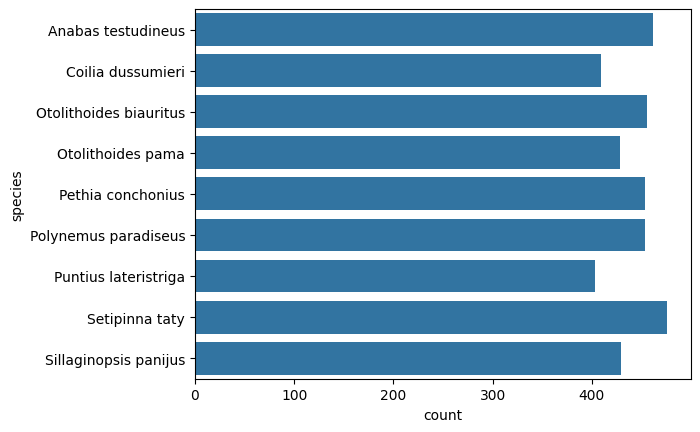

In [32]:
sns.countplot(y='species',data=df)

In [39]:
fig=px.pie(df,names='species',hole=0.5,title='Species Distribution')
fig.show()

In [40]:
fig=px.box(df,x='species',y='weight',title='Weight Distribution')
fig.show()